In [1]:
from data_reading import *

In [2]:
lep_author_data['AUTHOR'] = lep_author_data['AuthorLastname'] + ' ' + lep_author_data['AuthorInitials']
#ipd.display(lep_author_data)

In [3]:
lep_first = lep_author_data[lep_author_data['AuthorN'] == 1]
lep_first_count = lep_first['AUTHOR'].value_counts().reset_index()
lep_first_count.columns = ['Author', 'Count']

lep_other = lep_author_data[lep_author_data['AuthorN'] != 1]
lep_other_count = lep_other['AUTHOR'].value_counts().reset_index()
lep_other_count.columns = ['Author', 'Count']

merged_lep = pd.merge(lep_first_count, lep_other_count, on='Author', how='outer', suffixes=(' First', ' Other')).fillna(0)
merged_lep['Count Sum'] = merged_lep['Count First'] + merged_lep['Count Other']

lep_descending = merged_lep.sort_values(by=['Count Sum'], 
                                        ascending = False, 
                                        ignore_index = True)

lep_top50 = lep_descending.iloc[:50,:]

ipd.display(lep_top50)

,Author,Count First,Count Other,Count Sum
0,Ko AI,1.0,85.0,86.0
1,Picardeau M,6.0,72.0,78.0
2,Lilenbaum W,6.0,71.0,77.0
3,Dellagostin OA,1.0,59.0,60.0
4,Reis MG,0.0,57.0,57.0
5,Vasconcellos SA,0.0,56.0,56.0
6,Hartskeerl RA,2.0,54.0,56.0
7,Koizumi N,14.0,42.0,56.0
8,Costa F,5.0,36.0,41.0
9,Goarant C,4.0,37.0,41.0


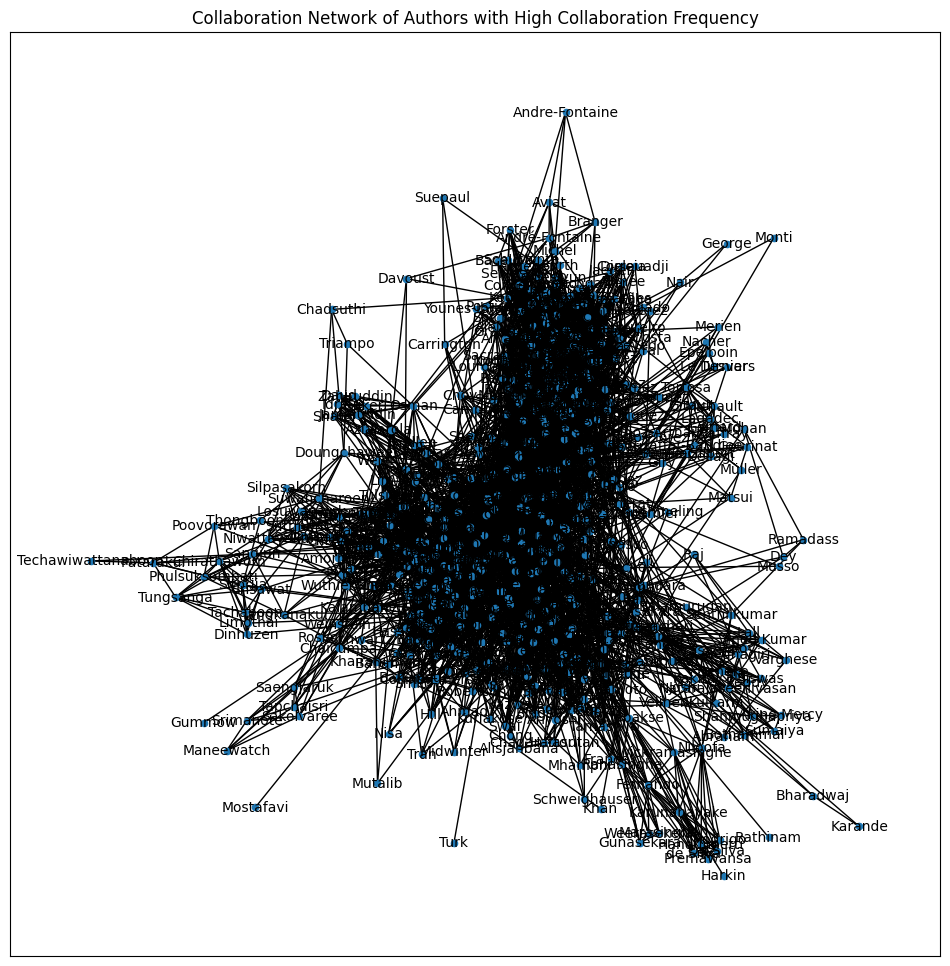

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Counting the number of collaborations per author and selecting authors with more collaborations
collaborations_count = Counter([author for sublist in lep_author_data.groupby('PMID')['AuthorLastname'].apply(list) for author in sublist])
selected_authors = [author for author, count in collaborations_count.items() if count > 5]

# Create subgraphs using only selected authors
G_sub = nx.Graph()
for pmid, group in lep_author_data[lep_author_data['AuthorLastname'].isin(selected_authors)].groupby('PMID'):
    authors = group['AuthorLastname'].tolist()
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            if authors[i] != authors[j]:
                G_sub.add_edge(authors[i], authors[j])

# Drawing subgraphs
plt.figure(figsize=(12, 12))
nx.draw_networkx(G_sub, with_labels=True, node_size=20, font_size=10)
plt.title("Collaboration Network of Authors with High Collaboration Frequency")
plt.show()


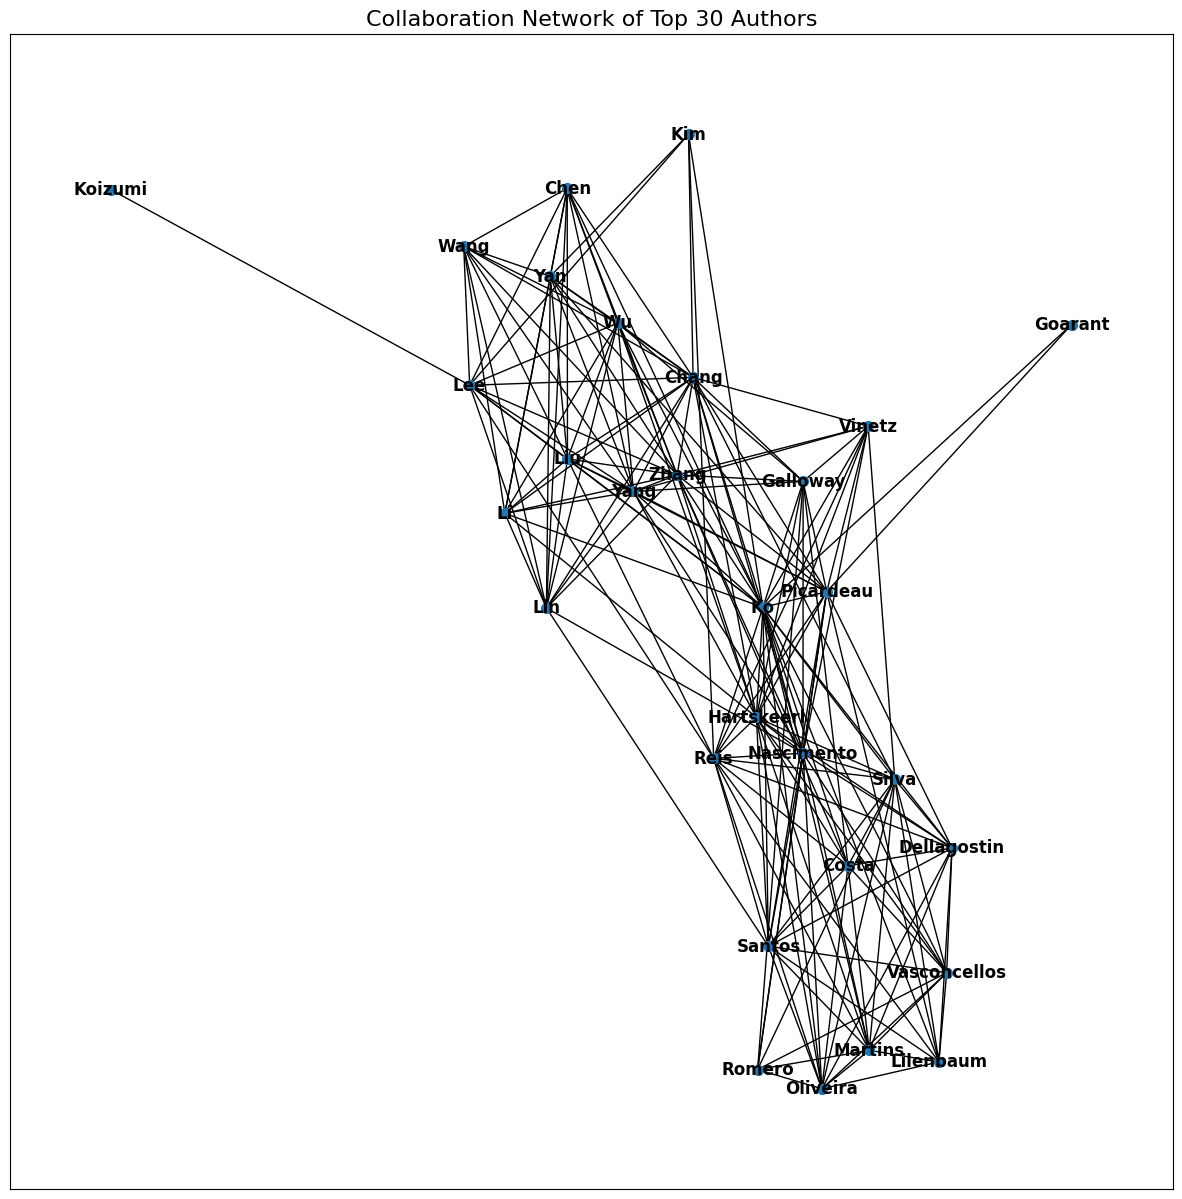

In [6]:
# Only the top 30 authors with the highest number of collaborations were selected for the graphs.
top_30_authors = [author for author, count in collaborations_count.most_common(30)]

# Create a subgraph containing only the first 30 authors
G_top30 = nx.Graph()
for pmid, group in lep_author_data[lep_author_data['AuthorLastname'].isin(top_30_authors)].groupby('PMID'):
    authors = group['AuthorLastname'].tolist()
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            if authors[i] != authors[j]:
                G_top30.add_edge(authors[i], authors[j])

# Mapping sub-maps of the top 30 authors
plt.figure(figsize=(15, 15))
nx.draw_networkx(G_top30, with_labels=True, node_size=50, font_size=12, font_weight='bold')
plt.title("Collaboration Network of Top 30 Authors", fontsize=16)
plt.show()


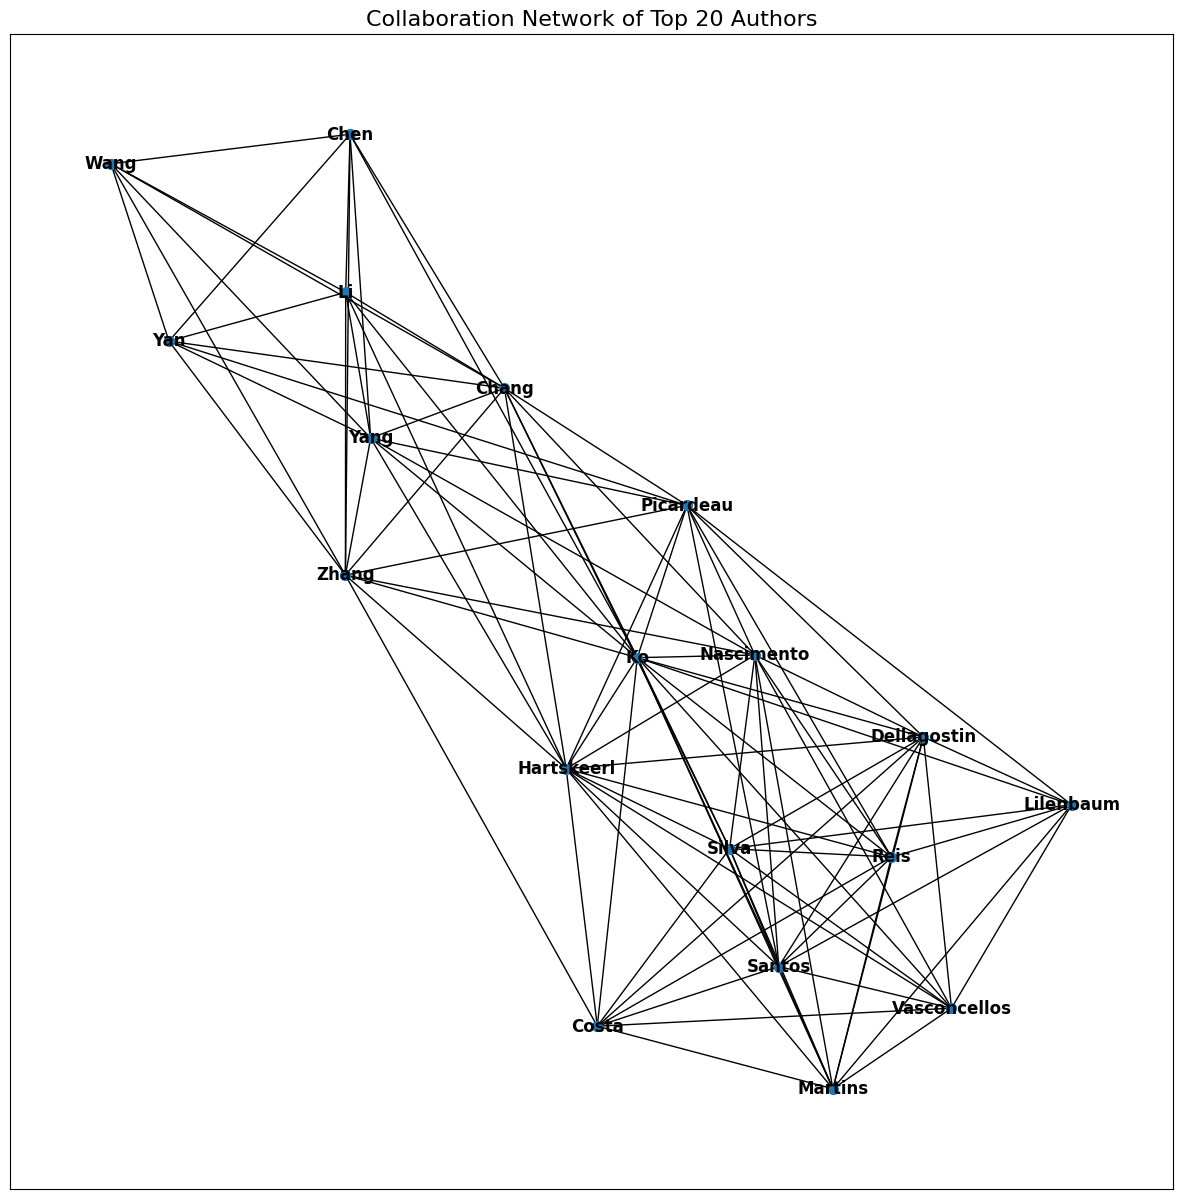

In [7]:
# Only the top 20 authors with the highest number of collaborations were selected to make the chart clearer
top_20_authors = [author for author, count in collaborations_count.most_common(20)]

# Create a subgraph containing only the top 20 authors
G_top20 = nx.Graph()
for pmid, group in lep_author_data[lep_author_data['AuthorLastname'].isin(top_20_authors)].groupby('PMID'):
    authors = group['AuthorLastname'].tolist()
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            if authors[i] != authors[j]:
                G_top20.add_edge(authors[i], authors[j])

# Mapping sub-maps of the top 20 authors
plt.figure(figsize=(15, 15))
nx.draw_networkx(G_top20, with_labels=True, node_size=50, font_size=12, font_weight='bold')
plt.title("Collaboration Network of Top 20 Authors", fontsize=16)
plt.show()
